# Decision Tree Classifier on Play Tennis Dataset

## Table of Contents

1. Import Libraries  
2. Load the Dataset  
3. Initial Data Exploration  
4. Data Preprocessing (Encoding)  
5. Train-Test Split  
6. Model Training (Decision Tree)  
7. Model Evaluation  
   - Accuracy  
   - Classification Report  
   - Confusion Matrix  
8. Visualize Decision Tree  
9. Predict on New Samples

# 1. Import Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the Dataset

In [2]:
df = pd.read_csv("Play_Tennis_Dataset.csv")

# 3. Initial Data Exploration

In [3]:
print("Sample Data:")
df.head()

Sample Data:


,Outlook,Temperature,Humidity,Windy,PlayTennis
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [4]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   PlayTennis   14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [5]:
print("\nClass Distribution:")
df['PlayTennis'].value_counts()


Class Distribution:


PlayTennis
Yes    9
No     5
Name: count, dtype: int64

# 4. Data Preprocessing (Encoding)

In [6]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'], drop_first=True)

X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis'].map({'Yes':1, 'No':0})

# 5. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Model Training (Decision Tree)

In [8]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# 7. Model Evaluation

## Accuracy

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.60


## Classification Report

In [10]:
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



## Confusion Matrix

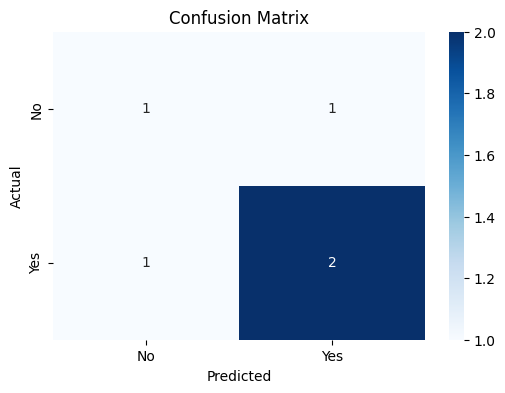

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. Visualize Decision Tree

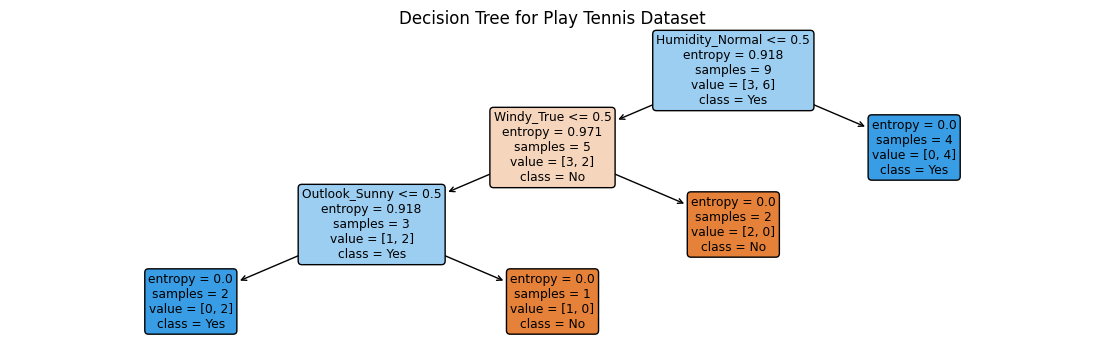

In [12]:
plt.figure(figsize=(14,4))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree for Play Tennis Dataset")
plt.show()

# 9. Predict on New Samples

In [13]:
X_train.columns

Index(['Outlook_Rainy', 'Outlook_Sunny', 'Temperature_Hot', 'Temperature_Mild',
       'Humidity_Normal', 'Windy_True'],
      dtype='object')

In [14]:
new_samples = pd.DataFrame({
    'Outlook_Rainy': [1, 0],
    'Outlook_Sunny': [0, 1],
    'Temperature_Hot': [0, 1],
    'Temperature_Mild': [1, 0],
    'Humidity_Normal': [1, 0],
    'Windy_True': [0, 1]
})

In [15]:
new_samples

,Outlook_Rainy,Outlook_Sunny,Temperature_Hot,Temperature_Mild,Humidity_Normal,Windy_True
0,1,0,0,1,1,0
1,0,1,1,0,0,1


## Predict

In [16]:
new_predictions = model.predict(new_samples)
new_predictions

array([1, 0], dtype=int64)

### Map predictions

In [17]:
label_map = {0: 'No', 1: 'Yes'}
predicted_labels = [label_map[pred] for pred in new_predictions]
predicted_labels

['Yes', 'No']

### Output

In [18]:
for i, label in enumerate(predicted_labels):
    print(f"Sample {i+1}: PlayTennis → {label}")

Sample 1: PlayTennis → Yes
Sample 2: PlayTennis → No
